In [1]:
#numpy中求样本均值、方差与标准差
import numpy as np
X=list(range(-5,6))
np.mean(X),np.var(X,ddof=1),np.std(X,ddof=1)

(0.0, 11.0, 3.3166247903554)

In [2]:
#pandas中求样本均值、方差与标准差
import pandas as pd 
df=pd.DataFrame()
df['data']=list(range(-5,6))
df['data'].mean(),df['data'].var(),df['data'].std()

(0.0, 11.0, 3.3166247903554)

In [3]:
#卡方分布

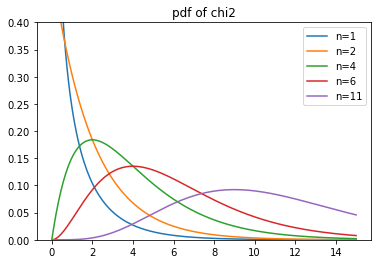

In [4]:
import matplotlib.pyplot as plt
#scipy中的chi2表示卡方分布
from scipy.stats import chi2
#不同的自由度
n=[1,2,4,6,11] 
x=np.linspace(0,15,200)
#设置y轴的上下限
plt.ylim(0,0.4) 
#不同自由度的卡方分布的概率密度曲线
for i in n:
    #chi2(i).pdf(x)表示自由度为i的卡方分布的概率密度函数值
    plt.plot(x,chi2(i).pdf(x),label='n={}'.format(i))
plt.title('pdf of chi2')
plt.legend()
plt.show()

In [5]:
from scipy.stats import chi2
chi2(3).mean(),chi2(5).var()

(3.0, 10.0)

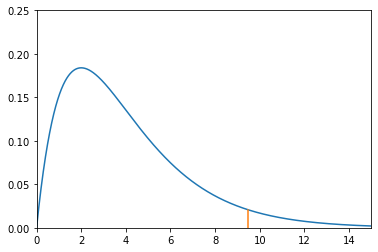

In [6]:
#自由度为4的卡方分布的上0.05分位数
from scipy.stats import chi2
import numpy as np
import matplotlib.pyplot as plt
x=np.linspace(0,100,100000)
y=chi2.pdf(x,4)
chi2_alpha=chi2.isf(0.05,4)
#绘制卡方分布的概率密度曲线
plt.plot(x,y)
#绘制上0.05分位数的垂直参考线，即点(chi2_alpha,0)与点(chi2_alpha,chi2.pdf(chi2_alpha,4))之间的连线
plt.plot([chi2_alpha,chi2_alpha],[0,chi2.pdf(chi2_alpha,4)])
#设置坐标轴范围
plt.xlim((0,15))
plt.ylim((0,0.25))
plt.show()

In [7]:
#t分布

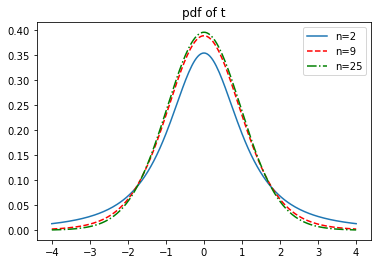

In [8]:
from scipy.stats import t
#不同自由度
n=[2,9,25]
x=np.linspace(-4,4,201)
#不同线条样式
lines_style=['','r--','g-.']
#线条样式的索引从0开始
style_index=0
#不同自由度的概率密度曲线
for i in n:
    #t(i).pdf(x)自由度为i的t分布的概率密度函数值
    plt.plot(x,t(i).pdf(x),lines_style[style_index],\
             label='n={}'.format(i))
    #线条样式的索引加1
    style_index+=1
plt.title('pdf of t')
plt.legend()
plt.show()

In [9]:
rv=t(9)
#rv.cdf(0),rv.cdf(-2),rv.sf(2)分别表示随机变量取值小于0的概率，取值小于-2的概率以及取值大于2的概率
np.round([rv.cdf(0),rv.cdf(-2),rv.sf(2)],5)

array([0.5    , 0.03828, 0.03828])

In [10]:
from scipy.stats import norm
#自由度为10000的t分布
rv_10000=t(10000)
#标准正态分布
rv_norm=norm()
#对比两者的上0.05分位数
rv_10000.isf(0.05),rv_norm.isf(0.05)

(1.645006018069243, 1.6448536269514729)

In [11]:
#F分布

In [12]:
x=np.linspace(0,3.5,200)
#f(m,n)表示第一自由度为m，第二自由度为n的f分布
rv_f=[f(10,40),f(11,3)]
labels=['(n1,n2)=(10,40)','(n1,n2)=(11,3)']
plt.ylim(0,1)
#绘制不同自由度f分布的概率密度曲线
for i in range(len(rv_f)):
    plt.plot(x,rv_f[i].pdf(x),label=labels[i])
plt.title('pdf of F ditribution')
plt.legend()
plt.show()

NameError: name 'f' is not defined

In [14]:
n1,n2=9,12
#交换第一与第二自由度
rv_f1=f(n1,n2)
rv_f2=f(n2,n1)
alpha=0.05
rv_f2.isf(1-alpha),1/rv_f1.isf(alpha)

(0.3576057663769152, 0.3576057663769152)

In [15]:
#几个重要定理的拟合验证

In [16]:
#定理一

In [26]:
np.random.seed(0)
#均值，标准差，样本容量
mu,sigma,n=1,2,4
#生成500行4列的数组，每一行是一组容量为4的样本
X=np.array([norm(mu,sigma).rvs(size=n) for _ in range(500)])
#按行求均值
mean_X=np.mean(X,axis=1) 
#对样本均值拟合正态分布，返回均值及标准差
norm.fit(mean_X)  #理论值应为(1,1)

(0.9683602328259682, 0.9843859004332948)

In [18]:
#定理二
#1)

In [27]:
import numpy as np
from scipy.stats import norm,chi2
np.random.seed(0)
mu,sigma,n=1,2,10
#生成1000*10的数组，每一行是一组容量为10的样本
X=np.array([norm(mu,sigma).rvs(size=n) for _ in range(1000)])
#按行求样本方差
S2=np.var(X,axis=1,ddof=1) 
#对(n-1)*S2/sigma**2拟合卡方分布，返回其自由度df
df,loc,scale=chi2.fit((n-1)*S2/sigma**2,floc=0,fscale=1)
df,loc,scale  #df理论值应为9

(8.871289062500018, 0, 1)

In [20]:
#定理3

In [21]:
import numpy as np
from scipy.stats import norm,t
np.random.seed(0)
mu,sigma,n=1,2,10
#生成2000*10的数组，每一行是一组容量为10的样本
x=np.array([norm(mu,sigma).rvs(size=n) for _ in range(2000)])
#按行求样本均值，样本标准差
mean_x=np.mean(x,axis=1)
S=np.std(x,axis=1,ddof=1)
X=(mean_x-mu)*np.sqrt(n)/S
#对X拟合t分布，返回其自由度df
df,loc,scale=t.fit(X,floc=0,fscale=1)
df,loc,scale  #df理论值为9

(9.250781250000017, 0, 1)

In [22]:
#定理4

In [23]:
#1)
import numpy as np
from scipy.stats import norm,f
n1,n2=4,5
mu1,mu2,sigma1,sigma2=1,2,3,4
np.random.seed(0)
#生成两组样本X，Y
X=np.array([norm(mu1,sigma1).rvs(size=n1) for _ in range(1000)])
Y=np.array([norm(mu2,sigma2).rvs(size=n2) for _ in range(1000)])
#按行求样本均值以及样本方差
meanX=np.mean(X,axis=1)
meanY=np.mean(Y,axis=1)
S1_2=np.var(X,axis=1,ddof=1)
S2_2=np.var(Y,axis=1,ddof=1)
#对(S1_2/S2_2)/(sigma1**2/sigma2**2)拟合f分布，返回第一自由度df1，第二自由度df2
df1,df2,loc,scale=f.fit((S1_2/S2_2)/(sigma1**2/sigma2**2),floc=0,fscale=1)
df1,df2,loc,scale  #df1理论值为3，df2理论值为4

(3.0911763047227048, 4.072398588237663, 0, 1)

In [24]:
#2)
import numpy as np
from scipy.stats import norm,t
n1,n2=4,5
#sigma1=sigma2
mu1,mu2,sigma1,sigma2=1,2,4,4
np.random.seed(0)
#生成两组样本X，Y
X=[norm(mu1,sigma1).rvs(size=n1) for _ in range(3000)]
Y=[norm(mu2,sigma2).rvs(size=n2) for _ in range(3000)]
#按行求样本均值以及样本方差
meanX=np.mean(X,axis=1)
meanY=np.mean(Y,axis=1)
S1_2=np.var(X,axis=1,ddof=1)
S2_2=np.var(Y,axis=1,ddof=1)

Sw_2=((n1-1)*S1_2+(n2-1)*S2_2)/(n1+n2-2)
Sw=np.sqrt(Sw_2)
datas=((meanX-meanY)-(mu1-mu2))/(Sw*np.sqrt(1/n1+1/n2))

#对datas拟合t分布，返回自由度df
df,loc,scale=t.fit(datas,floc=0,fscale=1)
df,loc,scale  #df理论值为7

(6.981835937500012, 0, 1)